# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [69]:
import random
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

Wi_x = [0]
Xi = [1, -1]

def x_pos():
    delta_t = 0.001
    t = 0
    while t <= 10:
        t += delta_t
        movimiento = random.choice(Xi)
        cambio = movimiento * t**(1/2)
        posicion = Wi_x[-1] + cambio
        Wi_x.append(posicion)
    return Wi_x

Wi_y = [0]
Yi = [1, -1]

def y_pos():
    delta_t = 0.001
    t = 0
    while t <= 10:
        t += delta_t
        movimiento = random.choice(Yi)
        cambio = movimiento * t**(1/2)
        posicion = Wi_y[-1] + cambio
        Wi_y.append(posicion)
    return Wi_y

Wi_z = [0]
Zi = [1, -1]

def z_pos():
    delta_t = 0.001
    t = 0
    while t <= 10:
        t += delta_t
        movimiento = random.choice(Zi)
        cambio = movimiento * t**(1/2)
        posicion = Wi_z[-1] + cambio
        Wi_z.append(posicion)
    return Wi_z


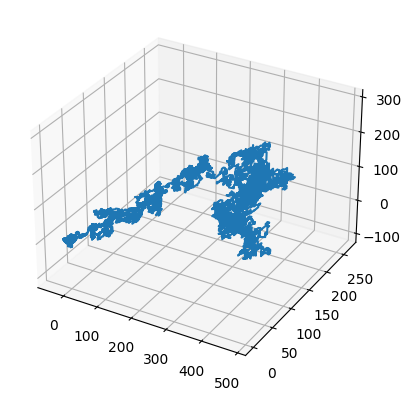

In [70]:
x = x_pos()
y = y_pos()
z = z_pos()

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot(x, y, z)
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

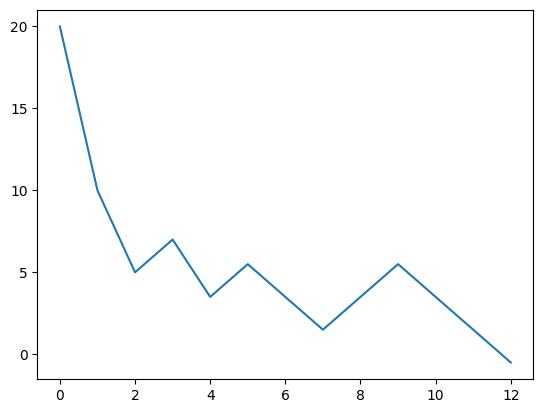

In [71]:
moneda = [-1, 1]

def tirar_volado():
    return random.choice(moneda)

def juego():
    Vi = tirar_volado()
    if Vi == 1:
        return True
    else:
        return False

Ci = [20]
def apuesta():
    while Ci[-1] > 0:
        if Ci[-1] >= 6:
            Ai = Ci[-1] / 2
        else:
            Ai = 2
        gano = juego()
        if gano:
            Ci.append(Ci[-1] + Ai)
        else:
            Ci.append(Ci[-1] - Ai)

apuesta()

plt.figure()
plt.plot(Ci)

In [72]:
juegos_para_quiebra = []
for i in range(10000):
    Ci = [20]
    contador_quiebra = 0
    def apuesta_prom():
        global contador_quiebra
        while Ci[-1] > 0:
            if Ci[-1] >= 6:
                Ai = Ci[-1] / 2
            else:
                Ai = 2
            gano = juego()
            if gano:
                Ci.append(Ci[-1] + Ai)
            else:
                Ci.append(Ci[-1] - Ai)
            contador_quiebra += 1
        juegos_para_quiebra.append(contador_quiebra)
    apuesta_prom()

prom_juegos_quiebra = sum(juegos_para_quiebra) / 10000
prom_juegos_quiebra

26.2228

(array([6.881e+03, 2.146e+03, 6.570e+02, 1.930e+02, 6.500e+01, 3.800e+01,
        1.400e+01, 4.000e+00, 0.000e+00, 2.000e+00]),
 array([  5. ,  29.1,  53.2,  77.3, 101.4, 125.5, 149.6, 173.7, 197.8,
        221.9, 246. ]),
 <BarContainer object of 10 artists>)

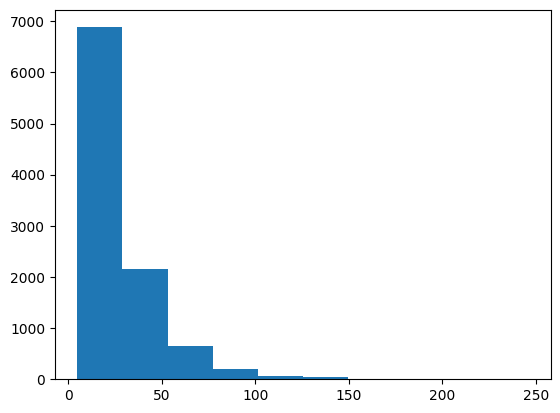

In [73]:
plt.hist(juegos_para_quiebra)